# Resampling Datetime Data (Core)

## Part 1) Load the data and make a datetime index.

In [1]:
# import packages
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [2]:
# import data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')

# preview data
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [3]:
# convert date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

# preview changes
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
# set date column as index
df = df.set_index('date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [5]:
# filter out required data: data > year 2000
df = df.loc['2000-01-01':]

# only keep features: precipitation, mean_temp, min_temp, max_temp, snow_depth
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]

# preview changes
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [6]:
# impute any missing values

# check for missing values
df.isna().sum()

# impute temp measures with .interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()
df['min_temp'] = df['min_temp'].interpolate()

# impute precipitation and snow_depth with 0's
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

# verify changes
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

## Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
Plot the feature that the question is asking about.
If there is a specific time period, plot only that time period.
Note: you may want to make a temporary DataFrame that you will use to answer this question only.

### Q1: What month had the most precipitation between 2000 through 2010?
Resample the precipitation column to a Monthly frequency using .sum() as the aggregation method

Find the date and corresponding value for the max precipitation.

Plot the feature and time period that corresponds to the question.
Make sure to meet the "Visualization Requirements" below!

Determine the date and value for the most precipitation (the max precipitation).

Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value.

Make sure to add a legend so that your label is visible.

#### Q1 Visualization Requirements

Use a combination of pandas, matplotlib tick formatters, tick locators, and th fig.autofmt_xdate method to


Create a wide figure (e.g. figsize=(12,3

)
With the title "Precipitation for 2000-20
10"
With a ylabel of "Inc
hes"
Customize the major xaxis tick
s to:
Have major xaxis ticks every 1
 year.
Use 4-digit years for the
 labels
Rotate the major ticks' labels 90 
degrees.
Customize the minor xaxis 
ticks to:
Have minor xaxis ticks ever

y 3 months
Do not label the minor ticks.

In [7]:
# preview dataframe
df.head()

# create new df to answer question
df_monthly = df.loc['2000-01-01':'2010-12-31']
df_monthly

# # resample precipitation column to monthly frequency using .sum() as agg method in new dataframe and "M" as frequency for month end
df_monthly = df_monthly['precipitation'].resample("M").sum()

# preview changes
df_monthly

# create variable for index with maximum value using idxmax
monthly_precipitation_max = df_monthly.idxmax()

# view result
monthly_precipitation_max

# create variable for max_precip
max_precip = df_monthly.loc[monthly_precipitation_max]
max_precip

138.4

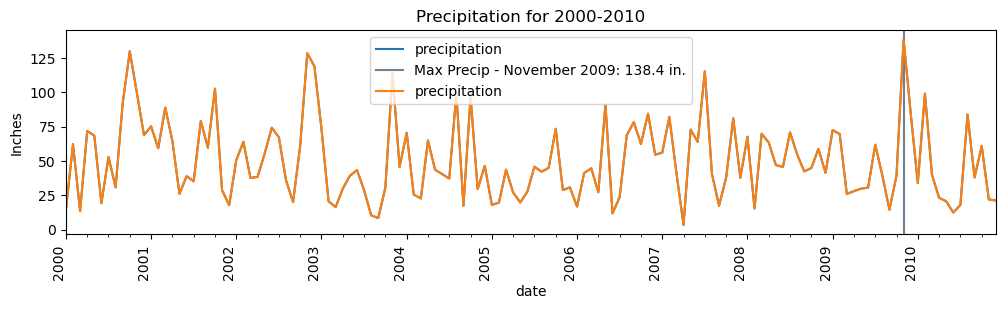

In [8]:
# # plot feature and time period that corresponds to question
ax = df_monthly.plot(figsize=(12, 3))

# add title
ax.set(title="Precipitation for 2000-2010", ylabel="Inches")

# add vertical line at max precipitation date with format '%B%Y' and value
fmt = "%B %Y"
ax.axvline(
    "2009-11-30",
    color="slategray",
    lw=1.5,
    label="Max Precip - "
    + monthly_precipitation_max.strftime(fmt)
    + ": "
    + str(max_precip)
    + " in.",
)

# format ticks
# customize major ticks
major_loc = mdates.YearLocator(1)
major_fmt = mdates.DateFormatter("%Y")

ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)


# customize minor ticks
minor_loc = mdates.MonthLocator(interval=3)
minor_fmt = mdates.DateFormatter("%b")

ax.xaxis.set_minor_locator(minor_loc)
ax.xaxis.set_minor_formatter(minor_fmt)

# to avoid pandas bug
df_monthly.plot(ax=ax);

## Final xdate tweaks
fig = ax.get_figure()
fig.autofmt_xdate(which="major", rotation=90)

# add legend
ax.legend();

### Q2: Which year between 2000-2020 had the coolest average temperature?
Resample the  mean_temp data to a Yearly frequency using .mean() as the aggregation method.

Plot the feature and time period that corresponds to the question.
Make sure to meet the "Visualization Requirements" below!
Determine the year and value for the lowest mean temp.
Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.



#### Q2 Visualization Requirements
Use a combination of pandas, matplotlib tick formatters, tick locators, and the fig.autofmt_xdate method to:
Create a wide figure (e.g. figsize=(12,3))
With the title "Average Temperature"
With a ylabel of "Degrees"
Customize the major xaxis ticks to:
Have major xaxis ticks every 5 years.
Use 4-digit years for the labels
Rotate the major ticks' labels 90 degrees.
Customize the minor xaxis ticks to:
Have minor xaxis ticks every 1 year
Do not label the minor ticks.

In [9]:
# preview original df
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


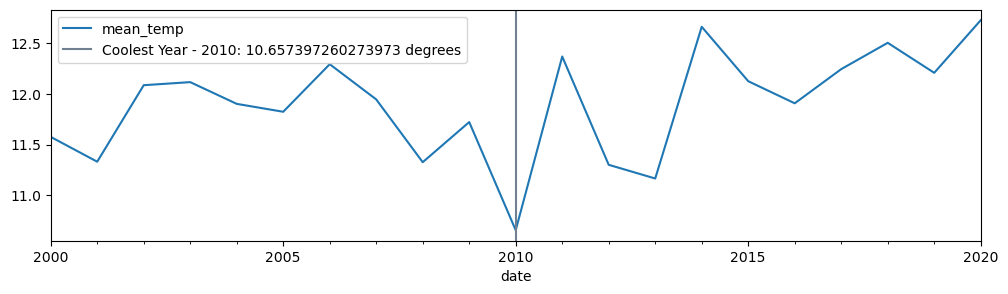

In [49]:
# create new df to answer question
df_yearly = df.loc['2000':'2020']
df_yearly

# resample mean_temp column to yearly frequency using .mean() as agg method in new dataframe and "Y" as frequency for year
df_yearly = df_yearly['mean_temp'].resample("A").mean()

# preview changes
df_yearly

# # # create variable for index with lowest value using idxmin
temp_min = df_yearly.idxmin()

# # view result
temp_min

# create variable for min_temp
min_temp = df_yearly.loc[temp_min]
min_temp

# plot
ax = df_yearly.plot(figsize=(12,3));

fmt = "%Y"
ax.axvline(
    "2010",
    color="slategray",
    lw=1.5,
    label="Coolest Year - "
    + temp_min.strftime(fmt)
    + ": "
    + str(min_temp)
    + " degrees ",
)
ax.legend()